In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-coffee-transactions/Coffe_sales.csv


In [3]:
df = pd.read_csv("/kaggle/input/daily-coffee-transactions/Coffe_sales.csv")
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [4]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [6]:
## no nulls, datatypes look okay except for date and time

In [7]:
## Fixing the datatypes

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Time'] = pd.to_datetime(df['Time'])

/tmp/ipykernel_36/2145562215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 304.9+ KB


In [11]:
# Quick check

In [12]:
print("Data Overview:")
print(df.info())
print(df.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 304.9+ KB
None
   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri      

In [13]:
# 2. Key Metrics

In [14]:
# first let's calculate the total revenue over the time 

df['Date'].min()

Timestamp('2024-03-01 00:00:00')

In [15]:
df['Date'].max()

Timestamp('2025-03-23 00:00:00')

In [16]:
#date range of the data is - 2024 March to 2025 March
#let's calculate monthly and yearly total revenue
# ------------------------------------------
# 📅 Monthly & Yearly Sales Analysis
# ------------------------------------------

# Extract Month and Year from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [17]:
monthly_sales = df.groupby(['Year', 'Month'])['money'].sum().reset_index()
monthly_sales

,Year,Month,money
0,2024,3,5905.20
1,2024,4,5719.56
2,2024,5,8164.42
3,2024,6,7617.76
4,2024,7,6915.94
5,2024,8,7613.84
6,2024,9,9988.64
7,2024,10,13891.16
8,2024,11,8590.54
9,2024,12,8237.74


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


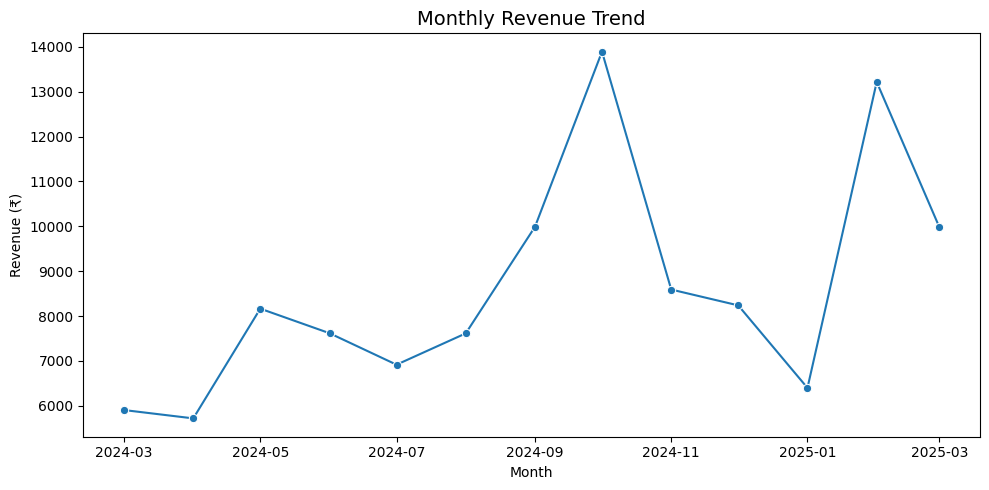

In [18]:
# Create a Year-Month label for better x-axis display
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='YearMonth', y='money', marker='o')
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()


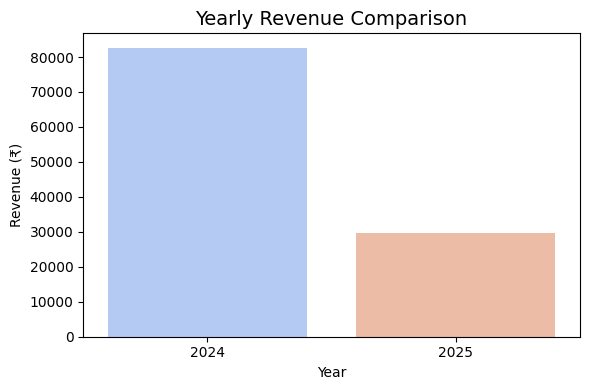

In [19]:
# --- Yearly Sales ---
yearly_sales = df.groupby('Year')['money'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=yearly_sales, x='Year', y='money', palette='coolwarm')
plt.title("Yearly Revenue Comparison", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

In [20]:
# Print summary
print("\n=== MONTHLY SALES SUMMARY ===")
print(monthly_sales)

print("\n=== YEARLY SALES SUMMARY ===")
print(yearly_sales)


=== MONTHLY SALES SUMMARY ===
    Year  Month     money  YearMonth
0   2024      3   5905.20 2024-03-01
1   2024      4   5719.56 2024-04-01
2   2024      5   8164.42 2024-05-01
3   2024      6   7617.76 2024-06-01
4   2024      7   6915.94 2024-07-01
5   2024      8   7613.84 2024-08-01
6   2024      9   9988.64 2024-09-01
7   2024     10  13891.16 2024-10-01
8   2024     11   8590.54 2024-11-01
9   2024     12   8237.74 2024-12-01
10  2025      1   6398.86 2025-01-01
11  2025      2  13215.48 2025-02-01
12  2025      3   9986.44 2025-03-01

=== YEARLY SALES SUMMARY ===
   Year     money
0  2024  82644.80
1  2025  29600.78


In [39]:
## Let's calculate key metrics like 
total_revenue = df['money'].sum()
total_transactions = len(df)
avg_transaction_value = df['money'].mean()
top_coffee = df.groupby('coffee_name')['money'].sum().idxmax()

print("\n=== KEY METRICS ===")
print(f"☕ Total Revenue: ₹{total_revenue:,.2f}")
print(f"🧾 Total Transactions: {total_transactions}")
print(f"💰 Average Transaction Value: ₹{avg_transaction_value:,.2f}")
print(f"🏆 Top-Selling Coffee: {top_coffee}")


=== KEY METRICS ===
☕ Total Revenue: ₹112,245.58
🧾 Total Transactions: 3547
💰 Average Transaction Value: ₹31.65
🏆 Top-Selling Coffee: Latte


In [21]:
### Let's check which hours of the day get the highest sales 
### hence the company can maintain the stock accordingly

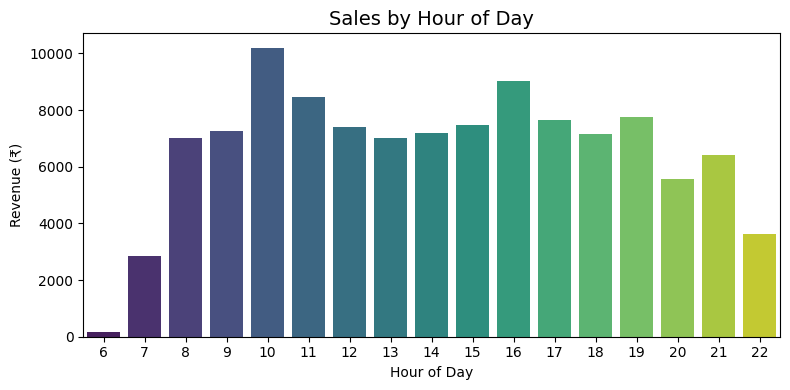

In [22]:
hourly_sales = df.groupby('hour_of_day')['money'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=hourly_sales, x='hour_of_day', y='money', palette='viridis')
plt.title("Sales by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

In [23]:
### Let's check which Time of day get the highest sales 
### hence the company can maintain the staff and stock accordingly

  Time_of_Day     money
0   Afternoon  38130.04
1     Morning  35929.20
2       Night  38186.34


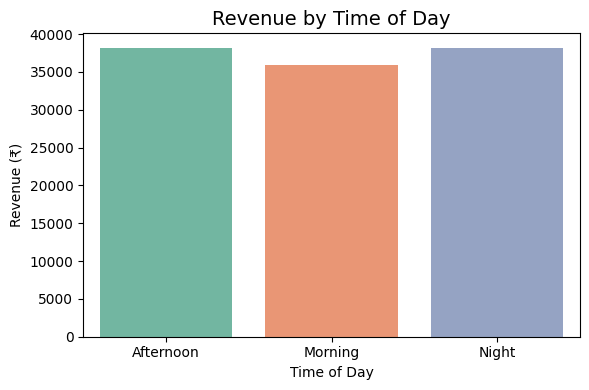

In [27]:
tod_sales = df.groupby('Time_of_Day')['money'].sum().reset_index()
print(tod_sales)
plt.figure(figsize=(6,4))
sns.barplot(data=tod_sales, x='Time_of_Day', y='money', palette='Set2')
plt.title("Revenue by Time of Day", fontsize=14)
plt.xlabel("Time of Day")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

In [28]:
### Let's see the top selling Coffee types

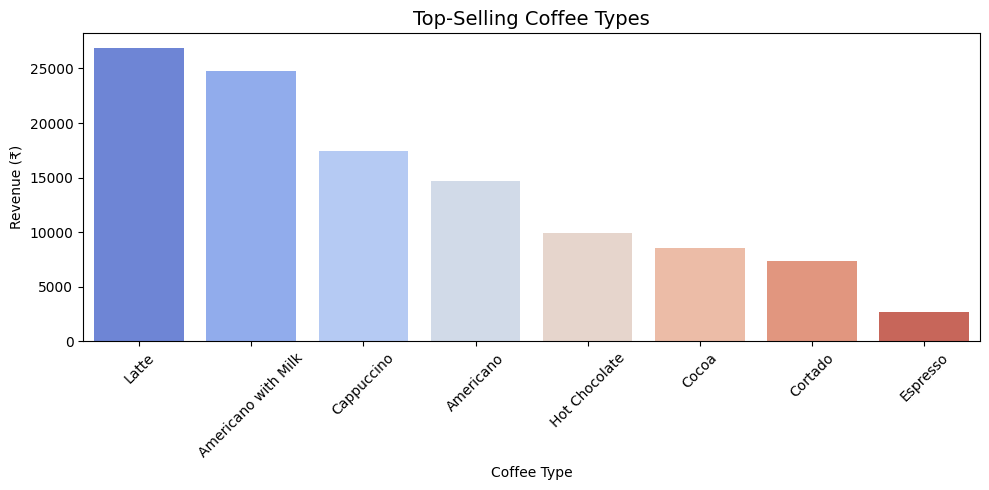

In [30]:
# ------------------------------------------
# Coffee Type Performance
# ------------------------------------------
coffee_sales = df.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=coffee_sales, x='coffee_name', y='money', palette='coolwarm')
plt.title("Top-Selling Coffee Types", fontsize=14)
plt.xlabel("Coffee Type")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
### What type of Payment type is preffered by the customers

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


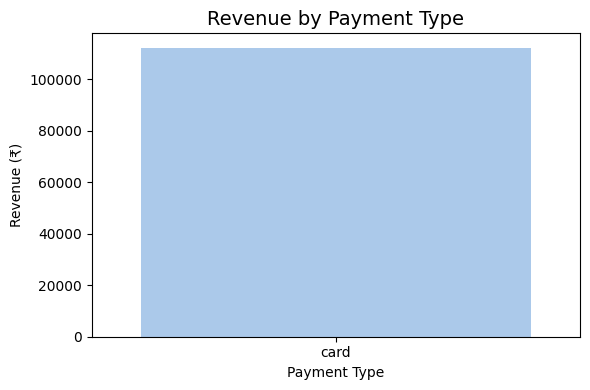

In [32]:
payment_sales = df.groupby('cash_type')['money'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=payment_sales, x='cash_type', y='money', palette='pastel')
plt.title("Revenue by Payment Type", fontsize=14)
plt.xlabel("Payment Type")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

In [33]:
df['cash_type'].unique()

array(['card'], dtype=object)

In [36]:
## Heatmap: Weekday vs Hourly Sales

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


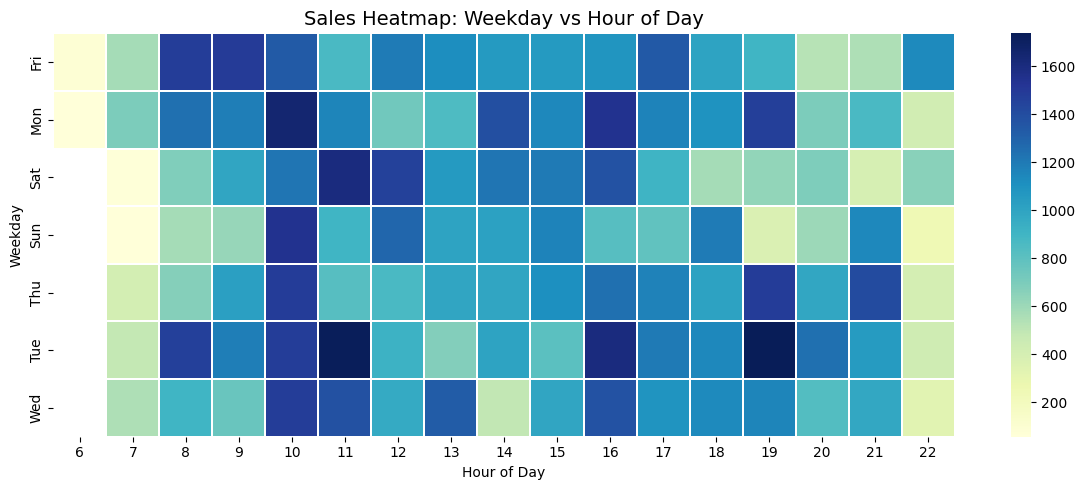

In [37]:
heatmap_data = df.pivot_table(values='money', index='Weekday', columns='hour_of_day', aggfunc='sum')

plt.figure(figsize=(12,5))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3)
plt.title("Sales Heatmap: Weekday vs Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

In [40]:
summary = {
    "Total Revenue (₹)": total_revenue,
    "Total Transactions": total_transactions,
    "Average Transaction Value (₹)": avg_transaction_value,
    "Top Coffee": top_coffee
}
summary_df = pd.DataFrame([summary])
print("\n=== SUMMARY TABLE ===")
print(summary_df)


=== SUMMARY TABLE ===
   Total Revenue (₹)  Total Transactions  Average Transaction Value (₹)  \
0          112245.58                3547                      31.645216   

  Top Coffee  
0      Latte  
